In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Keras functions
from keras.models import Sequential, Model
from keras.layers import Input
from keras.layers import Dense, Activation, Lambda, concatenate
from keras.optimizers import SGD

# Keras dataset
from keras.datasets import mnist

# Keras utilis function
from keras.utils import np_utils

from keras import backend as K

Using TensorFlow backend.


In [3]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train/255
x_test = x_test/255

In [5]:
enc_1 = Dense(100,activation='sigmoid')
enc_2 = Dense(2, activation='sigmoid')

dec_2 = Dense(100,activation='sigmoid')
dec_1 = Dense(784,activation='sigmoid')

In [6]:
x = Input(shape=(784,))

In [7]:
enc_x = enc_1(x)
h = enc_2(enc_x)

dec_x = dec_2(h)
x_reconstructed = dec_1(dec_x)

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
autoencoder = Model(x,x_reconstructed)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 784)               79184     
Total params: 158,186
Trainable params: 158,186
Non-trainable params: 0
_________________________________________________________________


In [9]:
autoencoder.compile(loss='kullback_leibler_divergence', optimizer='Nadam')

In [11]:
autoencoder.fit(x_train,x_train,batch_size=32,epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
60000/60000 [==============================] - 7s 109us/step - loss: -21.2891
Epoch 2/100
60000/60000 [==============================] - 6s 107us/step - loss: -22.0461
Epoch 3/100
60000/60000 [==============================] - 6s 106us/step - loss: -22.0491
Epoch 4/100
60000/60000 [==============================] - 6s 108us/step - loss: -22.0498
Epoch 5/100
60000/60000 [==============================] - 6s 106us/step - loss: -22.0500
Epoch 6/100
60000/60000 [==============================] - 6s 103us/step - loss: -22.0501
Epoch 7/100
60000/60000 [==============================] - 6s 108us/step - loss: -22.0501
Epoch 8/100
60000/60000 [==============================] - 7s 119us/step - loss: -22.0501
Epoch 9/100
60000/60000 [==============================] - 7s 120us/step - loss: -22.0501
Epoch 10/100
60000/60000 [==============================] - 7s 120us/step - loss: -22.0501
Epoch 11/100
60000/60000 [=========================

60000/60000 [==============================] - 6s 98us/step - loss: -22.0501
Epoch 87/100
60000/60000 [==============================] - 6s 99us/step - loss: -22.0501
Epoch 88/100
60000/60000 [==============================] - 6s 100us/step - loss: -22.0501
Epoch 89/100
60000/60000 [==============================] - 6s 101us/step - loss: -22.0501
Epoch 90/100
60000/60000 [==============================] - 6s 99us/step - loss: -22.0501
Epoch 91/100
60000/60000 [==============================] - 6s 100us/step - loss: -22.0501
Epoch 92/100
60000/60000 [==============================] - 6s 101us/step - loss: -22.0501
Epoch 93/100
60000/60000 [==============================] - 6s 100us/step - loss: -22.0501
Epoch 94/100
60000/60000 [==============================] - 6s 101us/step - loss: -22.0501
Epoch 95/100
60000/60000 [==============================] - 6s 100us/step - loss: -22.0501
Epoch 96/100
60000/60000 [==============================] - 6s 101us/step - loss: -22.0501
Epoch 97/100
60

In [12]:
Encoder = Model(x,h)
Encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 78,702
Trainable params: 78,702
Non-trainable params: 0
_________________________________________________________________


In [15]:
h_input = Input(shape=(2,))

Decoder = Model(h_input,dec_1(dec_2(h_input)))
Decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 784)               79184     
Total params: 79,484
Trainable params: 79,484
Non-trainable params: 0
_________________________________________________________________


# 視覺化 - Encoder

In [17]:
idx = np.random.randint(x_train.shape[0])
print("第 %d 圖的 latent 表示為 %s" %(idx,Encoder.predict(x_train[idx: idx+1])))

第 47844 圖的 latent 表示為 [[0.9999844 0.9999826]]


In [18]:
indices = np.random.randint(x_test.shape[0],size=1000) #測試資料

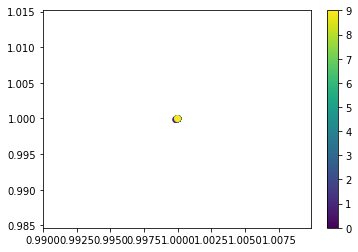

In [19]:
latents = Encoder.predict(x_test[indices])
plt.scatter(latents[:, 0],latents[:,1], c=y_test[indices])
plt.colorbar()
plt.show()

# 視覺化 - Decoder

In [25]:
n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = np.linspace(0.05, 0.95, n)
grid_y = np.linspace(0.05, 0.95, n)

In [26]:
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[(n-i-1) * digit_size: (n - i) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

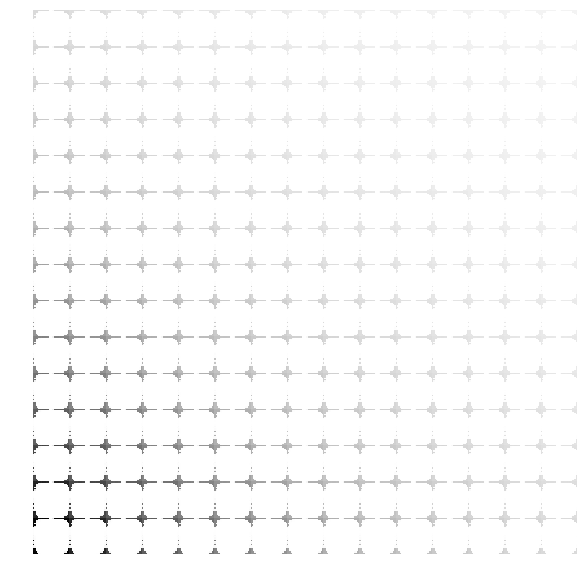

In [27]:
plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.axis('off')
plt.show()

# VAE construction

In [28]:
enc_1 = Dense(100,activation='sigmoid')

enc_mean = Dense(2)
enc_log_var = Dense(2)

dec_2 = Dense(100,activation='sigmoid')
dec_1 = Dense(784,activation='sigmoid')

In [30]:
x = Input(shape=(784,))
enc_x = enc_1(x)

z_mean = enc_mean(enc_x)
z_log_var = enc_log_var(enc_x)

In [33]:
def sampling(args):
    z_mean,z_log_var = args
    epsilon = K.random_normal(shape=(2,),mean=0.,stddev=1)
    return z_mean + K.exp(z_log_var / 2) * epsilon

In [34]:
z = Lambda(sampling,output_shape=(2,))([z_mean,z_log_var])

In [35]:
dec_x = dec_2(z)
x_reconstructed = dec_1(dec_x)

In [36]:
VAE = Model(x,x_reconstructed)
VAE.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 100)          78500       input_4[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 2)            202         dense_5[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 2)            202         dense_5[0][0]                    
__________________________________________________________________________________________________
lambda_2 (

# Loss 函數的建立

In [38]:
from keras import metrics

In [41]:
def vae_loss(x,x_recon):
    
    recovery_loss = 784 * metrics.binary_crossentropy(x,x_recon)
    
    kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis =1)
    
    return recovery_loss + kl_loss

# 訓練 VAE

In [42]:
VAE.compile(loss=vae_loss,optimizer='Nadam')

In [43]:
VAE.fit(x_train,x_train,batch_size=32,epochs=100)

Epoch 1/100
60000/60000 [==============================] - 8s 128us/step - loss: 188.6580
Epoch 2/100
60000/60000 [==============================] - 8s 139us/step - loss: 178.0561
Epoch 3/100
60000/60000 [==============================] - 8s 131us/step - loss: 170.9925
Epoch 4/100
60000/60000 [==============================] - 8s 130us/step - loss: 166.1415
Epoch 5/100
60000/60000 [==============================] - 8s 133us/step - loss: 163.2879
Epoch 6/100
60000/60000 [==============================] - 8s 130us/step - loss: 160.9025
Epoch 7/100
60000/60000 [==============================] - 8s 129us/step - loss: 158.8143
Epoch 8/100
60000/60000 [==============================] - 8s 128us/step - loss: 157.2032
Epoch 9/100
60000/60000 [==============================] - 8s 128us/step - loss: 155.9350
Epoch 10/100
60000/60000 [==============================] - 8s 128us/step - loss: 154.8293
Epoch 11/100
60000/60000 [==============================] - 8s 128us/step - loss: 153.9324
Epoch 12

60000/60000 [==============================] - 7s 115us/step - loss: 142.9442
Epoch 91/100
60000/60000 [==============================] - 7s 119us/step - loss: 142.9273
Epoch 92/100
60000/60000 [==============================] - 8s 139us/step - loss: 142.9898
Epoch 93/100
60000/60000 [==============================] - 8s 140us/step - loss: 142.8618
Epoch 94/100
60000/60000 [==============================] - 9s 143us/step - loss: 142.9353
Epoch 95/100
60000/60000 [==============================] - 8s 138us/step - loss: 142.8414
Epoch 96/100
60000/60000 [==============================] - 8s 131us/step - loss: 142.8122
Epoch 97/100
60000/60000 [==============================] - 8s 132us/step - loss: 142.7817
Epoch 98/100
60000/60000 [==============================] - 7s 122us/step - loss: 142.7921
Epoch 99/100
60000/60000 [==============================] - 7s 125us/step - loss: 142.7344
Epoch 100/100
60000/60000 [==============================] - 10s 159us/step - loss: 142.6770


In [44]:
VAE_Encoder = Model(x, z_mean)

VAE_Encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 202       
Total params: 78,702
Trainable params: 78,702
Non-trainable params: 0
_________________________________________________________________


In [45]:
VAE_Decoder = Model(h_input, dec_1(dec_2(h_input)))

VAE_Decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_9 (Dense)              (None, 784)               79184     
Total params: 79,484
Trainable params: 79,484
Non-trainable params: 0
_________________________________________________________________


# VAE視覺化

In [46]:
idx = np.random.randint(x_train.shape[0])
print("第 %d 圖的 latent 表示為 %s" %(idx, VAE_Encoder.predict(x_train[idx: idx+1])))

第 39856 圖的 latent 表示為 [[-2.018197   -0.11124124]]


In [47]:
# indices = np.random.randint(x_test.shape[0], size=1000)
VAE_latents = VAE_Encoder.predict(x_test[indices])

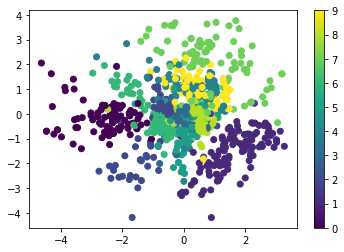

In [48]:
plt.scatter(VAE_latents[:,0],VAE_latents[:,1],c=y_test[indices])
plt.colorbar()
plt.show()

In [57]:
def normalize_to_unit(x):
    x -=x.min()
    x /=x.max()
    return x  #得0~1

In [58]:
grid_x_vae = np.linspace(-4+0.05,4-0.05,n)
grid_y_vae = np.linspace(-4+0.05,4-0.05,n)
VAE_figure = np.zeros((digit_size * n,digit_size * n))
for i, yi in enumerate(grid_x_vae):
    for j, xi in enumerate(grid_y_vae):
        z_sample = np.array([[xi, yi]])
        x_decoded = VAE_Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        VAE_figure[(n-i-1) * digit_size:(n-i) * digit_size,
                  j * digit_size:(j + 1) * digit_size] = normalize_to_unit(digit)

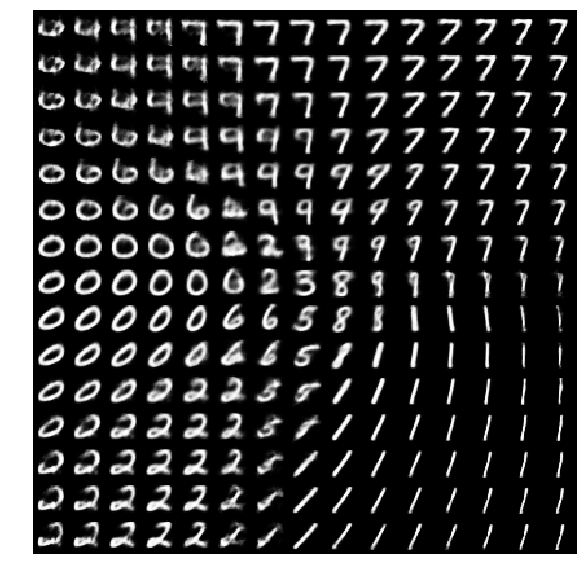

In [59]:
plt.figure(figsize=(10, 10))
plt.imshow(VAE_figure, cmap='Greys_r')
plt.axis('off')
plt.show()

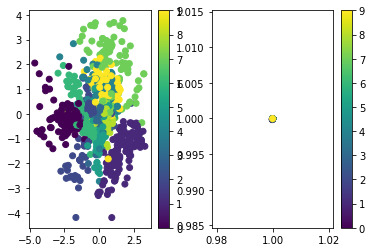

In [56]:
plt.subplot(1, 2, 1)
plt.scatter(VAE_latents[:, 0], VAE_latents[:, 1], c=y_test[indices])
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(latents[:, 0], latents[:, 1], c=y_test[indices])
plt.colorbar()
plt.show()